# Credit defaulters identification using Logistic Regression

Introduction to the data set

German credit rating dataset contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit. The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset can be downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

## Objective of the study

1. Read the dataset
2. Create dummy variables for the categorical features
3. Specify X ( independent) and y (target/dependent) features
4. Split datasets into train and test datasets
5. Build a logistic regression model
6. Find significant variables
7. Create confusion matrix to find out Sensitivity and specificity
8. Draw ROC Plot
9. Find optimal cutoff probability using yoden's index
10. Find optimal cutoff probability using cost

### Read the data set

In [254]:
import pandas as pd
import numpy as np

In [255]:
data = pd.read_csv( "german.data", delim_whitespace = True, header = None )

In [256]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [257]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_acc', 'present_emp_since', 
           'inst_rate', 'personal_status', 'other_debtors', 'residing_since', 'property', 'age','inst_plans', 'housing', 
           'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [259]:
data.columns = columns

In [260]:
data.head(2)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [261]:
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

#### How many default and no default observations in the sample

In [264]:
data.status.value_counts()

1    700
2    300
Name: status, dtype: int64

There are about 300 defaults and 700 non-default observations

### Create dummy variables for the categorical features

In [265]:
data.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [171]:
list(data.columns )

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker',
 'status']

#### Remove the response variable from the dataset

In [266]:
X_features = list(data.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker']

In [173]:
data_complete = pd.get_dummies(data[X_features], drop_first = True )

In [267]:
len(data_complete.columns )

48

In [268]:
data_complete.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


#### Change the reponse variable to 0 = No Default and 1 = Default

In [271]:
y = data.status - 1
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: status, Length: 1000, dtype: int64

In [272]:
x = data_complete

### Specify X ( independent) and y (target/dependent) features

### Split datasets into train and test datasets

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [275]:
y_test[0:10]

93     0
425    0
764    0
405    1
546    0
755    1
591    0
889    0
995    0
839    0
Name: status, dtype: int64

### Build a logistic regression model

In [276]:
import statsmodels.api as sm

In [277]:
logit = sm.Logit( y_train, sm.add_constant(x_train ) )

In [279]:
lg = logit.fit()

         Current function value: 0.447131
         Iterations: 35


C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [281]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           48
Date:                Wed, 24 Feb 2021   Pseudo R-squ.:                  0.2830
Time:                        12:10:01   Log-Likelihood:                -312.99
converged:                      False   LL-Null:                       -436.52
Covariance Type:            nonrobust   LLR p-value:                 1.379e-28
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7926      1.332      0.595      0.552      -1.817       3.403
duration                  0.0310      0.011      2.760      0.006       0.009       0.053
amount                    0.0001   5.48e-05      2.493      0.013    2.92e-05       0.000
inst_rate                 0.2905      0.104      2.786      0.005       0.086       0.495
residing_since           -0.1220      0.104     -1.171      0.242      -0.326       0.082
age                      -0.0138      0.011     -1.283      0.200      -0.035       0.007
num_credits               0.3396      0.232      1.467      0.142      -0.114       0.793
dependents                0.4688      0.310      1.511      0.131      -0.139       1.077
checkin_acc_A12          -0.3768      0.265     -1.419      0.156      -0.897       0.143
checkin_acc_A13          -0.8934      0.480     -1.862      0.063      -1.834       0.047
checkin_acc_A14          -1.7064      0.279     -6.107      0.000      -2.254      -1.159
credit_history_A31        1.0470      0.700      1.496      0.135      -0.325       2.419
credit_history_A32       -0.0240      0.514     -0.047      0.963      -1.032       0.984
credit_history_A33       -0.5223      0.553     -0.945      0.345      -1.606       0.561
credit_history_A34       -0.9471      0.530     -1.788      0.074      -1.985       0.091
purpose_A41              -1.6842      0.463     -3.641      0.000      -2.591      -0.778
purpose_A410             -1.3947      1.003     -1.391      0.164      -3.360       0.571
purpose_A42              -0.7920      0.324     -2.447      0.014      -1.426      -0.158
purpose_A43              -0.7867      0.296     -2.654      0.008      -1.368      -0.206
purpose_A44              -0.0765      0.909     -0.084      0.933      -1.858       1.705
purpose_A45              -0.2596      0.629     -0.413      0.680      -1.492       0.973
purpose_A46               0.1283      0.471      0.273      0.785      -0.794       1.051
purpose_A48             -16.9100   2808.195     -0.006      0.995   -5520.871    5487.051
purpose_A49              -0.8956      0.405     -2.210      0.027      -1.690      -0.101
svaing_acc_A62           -0.2162      0.349     -0.619      0.536      -0.901       0.469
svaing_acc_A63           -0.2226      0.484     -0.460      0.645      -1.171       0.725
svaing_acc_A64           -0.8078      0.576     -1.403      0.161      -1.936       0.320
svaing_acc_A65           -0.7609      0.313     -2.435      0.015      -1.373      -0.148
present_emp_since_A72    -0.7006      0.509     -1.377      0.169      -1.698       0.297
present_emp_since_A73    -0.7703      0.490     -1.572      0.116      -1.731       0.190
present_emp_since_A74    -1.6533      0.545     -3.034      0.002      -2.721      -0.585
present_emp_since_A75    -0.7516      0.482     -1.560      0.119      -1.696       0.193
personal_status_A92      -1.0079      0.481     -2.094      0.036      -1.951      -0.064
p

### Find significant variables

In [282]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [283]:
significant_vars = get_significant_vars( lg )

In [284]:
significant_vars

['duration',
 'amount',
 'inst_rate',
 'checkin_acc_A14',
 'purpose_A41',
 'purpose_A42',
 'purpose_A43',
 'purpose_A49',
 'svaing_acc_A65',
 'present_emp_since_A74',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A143']

### Predict Test Data and Measure Accuracy

In [286]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [287]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [288]:
y_pred_df = get_predictions( y_test, lg )

#### Status_1 columns provides the predicted probability for the default classes

In [289]:
y_pred_df[0:10]

,actual,predicted_prob
93,0,0.428878
425,0,0.176100
764,0,0.092155
405,1,0.352353
546,0,0.139654
755,1,0.578642
591,0,0.489975
889,0,0.171622
995,0,0.038990
839,0,0.205888


In [290]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [291]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
93,0,0.428878,0
425,0,0.176100,0
764,0,0.092155,0
405,1,0.352353,0
546,0,0.139654,0
755,1,0.578642,1
591,0,0.489975,0
889,0,0.171622,0
995,0,0.038990,0
839,0,0.205888,0


### Create confusion matrix to find out Sensitivity and specificity

In [292]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [295]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()

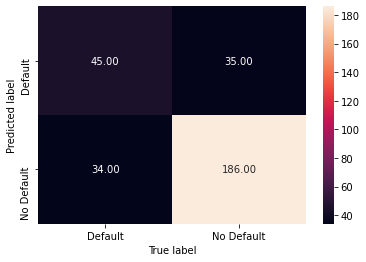

In [296]:
draw_cm(y_pred_df.predicted,  y_pred_df.actual)

Note: the model could only predict very few default classes.

In [297]:
classification_report(y_pred_df.actual, y_pred_df.predicted)

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.84       221\n           1       0.56      0.57      0.57        79\n\n    accuracy                           0.77       300\n   macro avg       0.70      0.71      0.70       300\nweighted avg       0.77      0.77      0.77       300\n'

#### Overall accuracy of the model 

In [299]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.77


In [300]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.56


In [301]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.57


In [302]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [304]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [305]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.57


In [306]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [307]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.84


### Predicted Probability distribution Plots for Defaults and Non Defaults 

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='predicted_prob'>

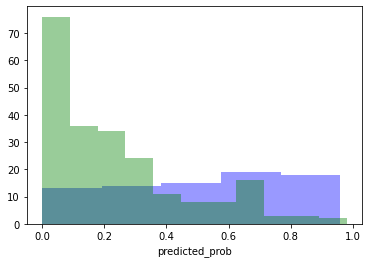

In [308]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

### Draw ROC Plot

In [309]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.79

In [310]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

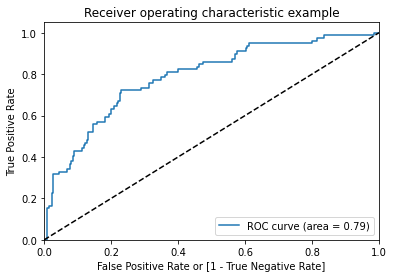

In [311]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Draw ROC Plot

In [312]:
thresholds[0:10]

array([1.97964687, 0.97964687, 0.97882769, 0.96013422, 0.93152262,
       0.90452308, 0.90432814, 0.89508024, 0.88238537, 0.88151919])

In [313]:
fpr[0:10]

array([0.        , 0.00452489, 0.00904977, 0.00904977, 0.00904977,
       0.00904977, 0.00904977, 0.00904977, 0.00904977, 0.00904977])

In [314]:
tpr[0:10]

array([0.        , 0.        , 0.        , 0.01265823, 0.02531646,
       0.03797468, 0.05063291, 0.06329114, 0.07594937, 0.08860759])

In [ ]:
#Finding Optimal Cutoff Point
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [316]:
y_pred_df.head()

,actual,predicted_prob,predicted
93,0,0.428878,0
425,0,0.176100,0
764,0,0.092155,0
405,1,0.352353,0
546,0,0.139654,0


In [318]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.predicted_prob.map( lambda x: 1 if x > i else 0)
y_pred_df.head()

,actual,predicted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
93,0,0.428878,0,1,1,1,1,1,0,0,0,0,0
425,0,0.176100,0,1,1,0,0,0,0,0,0,0,0
764,0,0.092155,0,1,0,0,0,0,0,0,0,0,0
405,1,0.352353,0,1,1,1,1,0,0,0,0,0,0
546,0,0.139654,0,1,1,0,0,0,0,0,0,0,0


In [319]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_df.actual, y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263333  0.000000  1.000000
0.1   0.1  0.526667  0.375566  0.949367
0.2   0.2  0.623333  0.552036  0.822785
0.3   0.3  0.706667  0.696833  0.734177
0.4   0.4  0.746667  0.782805  0.645570
0.5   0.5  0.770000  0.841629  0.569620
0.6   0.6  0.770000  0.886878  0.443038
0.7   0.7  0.786667  0.954751  0.316456
0.8   0.8  0.770000  0.977376  0.189873
0.9   0.9  0.743333  0.990950  0.050633


<AxesSubplot:xlabel='prob'>

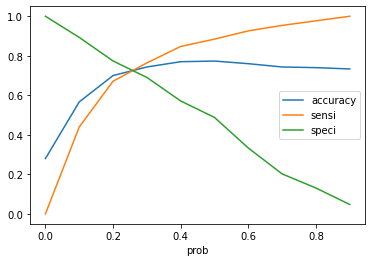

In [225]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [320]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.25 else 0)

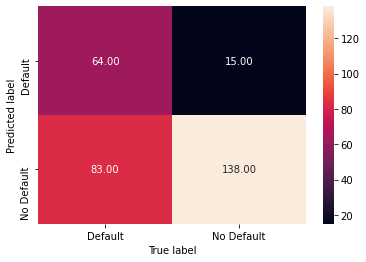

In [322]:
draw_cm( y_pred_df.actual, y_pred_df.predicted)

### Find optimal cutoff probability using yoden's index

1. Youden's index is where (Sensitivity+Specificity - 1) is maximum.

That is when (TPR+TNR -1) is maximum.

max( TPR - (1 - TNR) )

max( TPR - FPR )

In [324]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )
tpr_fpr.head()

,tpr,fpr,thresholds
0,0.000000,0.000000,1.979647
1,0.000000,0.004525,0.979647
2,0.000000,0.009050,0.978828
3,0.012658,0.009050,0.960134
4,0.025316,0.009050,0.931523


In [325]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

In [326]:
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,tpr,fpr,thresholds,diff
108,0.721519,0.230769,0.352353,0.490750
109,0.721519,0.235294,0.348583,0.486225
106,0.708861,0.226244,0.364628,0.482616
110,0.721519,0.239819,0.342824,0.481700
107,0.708861,0.230769,0.362267,0.478092
111,0.721519,0.244344,0.342341,0.477175
112,0.721519,0.248869,0.340832,0.472650
105,0.696203,0.226244,0.365149,0.469958
113,0.721519,0.253394,0.339214,0.468125
114,0.721519,0.257919,0.339014,0.463600


In [327]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.35 else 0)

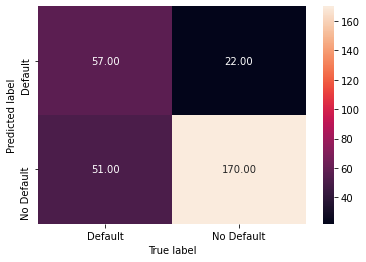

In [329]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

### Find optimal cutoff probability using cost

In [330]:
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

In [331]:
cm_mat = np.array( cm )

In [332]:
cm_mat[1, 0]

51

In [333]:
cm_mat[0, 1]

22

In [334]:
def get_total_cost( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * 2 + cm_mat[0,1] * 1

In [335]:
get_total_cost( y_pred_df.actual, y_pred_df.predicted_new )

66

In [336]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [337]:
idx = 0
for each_prob in range( 20, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0) )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [338]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
0,0.20,42.0
1,0.21,42.0
2,0.22,42.0
3,0.23,45.0
4,0.24,45.0


In [339]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.20 else 0)

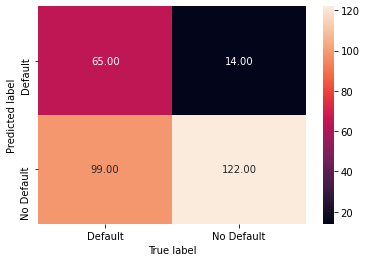

In [341]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

Note: Predicting Defaults as No Defaults have been minimized

In [342]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.62
Precision :  0.4
Recall :  0.82
Sensitivity :  0.82
Specificity :  0.55


## Note: Total accuracy of the model is 62%, becuase the objective is not to improve total accuracy but minimize the quadrants that contribute to the cost.